<a href="https://colab.research.google.com/github/Mephod1y/DataScience/blob/main/Hw11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import imdb
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense, LSTM, Dropout, Bidirectional
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
max_features = 10000
maxlen = 500
batch_size = 32
epochs = 3

In [ ]:
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)

17464789/17464789 [==============================] - 0s 0us/step


In [ ]:
input_train = pad_sequences(input_train, maxlen=maxlen)
input_test = pad_sequences(input_test, maxlen=maxlen)

**Модель SimpleRNN**

In [ ]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          320000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                2080      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 322113 (1.23 MB)
Trainable params: 322113 (1.23 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history = model.fit(input_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.3)

Epoch 1/3
547/547 [==============================] - 76s 134ms/step - loss: 0.5337 - acc: 0.7271 - val_loss: 0.4678 - val_acc: 0.7876
Epoch 2/3
547/547 [==============================] - 65s 119ms/step - loss: 0.3501 - acc: 0.8541 - val_loss: 0.3858 - val_acc: 0.8364
Epoch 3/3
547/547 [==============================] - 66s 121ms/step - loss: 0.2707 - acc: 0.8950 - val_loss: 0.4074 - val_acc: 0.8512


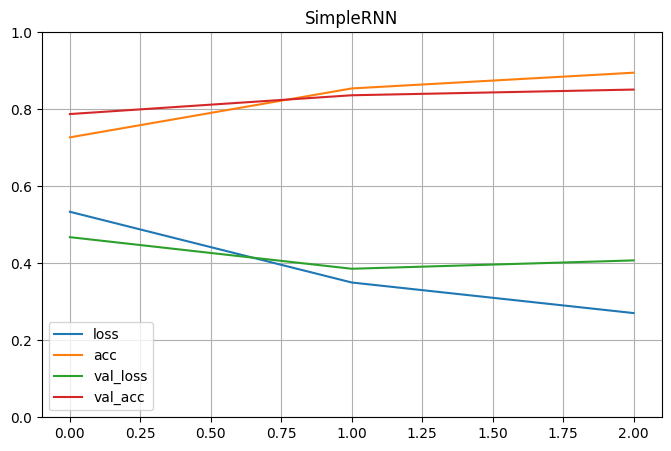

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.title("SimpleRNN")
plt.show()

In [ ]:
predictions = model.predict(input_test)

binary_predictions = ['positive' if pred > 0.5 else 'negative' for pred in predictions]

for i in range(10):
    print(f"Predicted: {binary_predictions[i]}, Label: {'positive' if y_test[i] > 0.5 else 'negative'}")

test_loss, test_acc = model.evaluate(input_test, y_test)
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

782/782 [==============================] - 20s 26ms/step
Predicted: negative, Label: negative
Predicted: positive, Label: positive
Predicted: negative, Label: positive
Predicted: negative, Label: negative
Predicted: positive, Label: positive
Predicted: negative, Label: positive
Predicted: positive, Label: positive
Predicted: negative, Label: negative
Predicted: positive, Label: negative
Predicted: positive, Label: positive
782/782 [==============================] - 19s 24ms/step - loss: 0.4249 - acc: 0.8414
Test Loss: 0.4249233901500702
Test Accuracy: 0.8414000272750854


**Модель LSTM**

In [ ]:
embedding_vector_length = 32
model = Sequential()
model.add(Embedding(input_dim=max_features, output_dim=embedding_vector_length, input_length=maxlen))
model.add(Dropout(0.2))
model.add(LSTM(32))
model.add(Dense(units=256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation='sigmoid'))
model.summary()

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 500, 32)           320000    
                                                                 
 dropout (Dropout)           (None, 500, 32)           0         
                                                                 
 lstm (LSTM)                 (None, 32)                8320      
                                                                 
 dense_1 (Dense)             (None, 256)               8448      
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 257       
                                                                 
Total params: 337025 (1.29 MB)
Trainable params: 33702

In [ ]:
history = model.fit(input_train, y_train, batch_size=batch_size, epochs=epochs,validation_split=0.3)

Epoch 1/3
547/547 [==============================] - 137s 245ms/step - loss: 0.4316 - accuracy: 0.7931 - val_loss: 0.3396 - val_accuracy: 0.8624
Epoch 2/3
547/547 [==============================] - 130s 237ms/step - loss: 0.2456 - accuracy: 0.9071 - val_loss: 0.2924 - val_accuracy: 0.8828
Epoch 3/3
547/547 [==============================] - 132s 241ms/step - loss: 0.1862 - accuracy: 0.9313 - val_loss: 0.3548 - val_accuracy: 0.8471


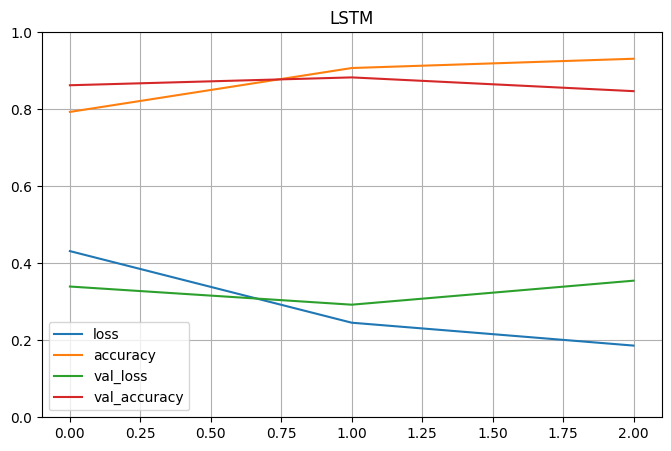

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.title("LSTM")
plt.show()

In [ ]:
predictions = model.predict(input_test)

binary_predictions = ['positive' if pred > 0.5 else 'negative' for pred in predictions]

for i in range(10):
    print(f"Predicted: {binary_predictions[i]}, Label: {'positive' if y_test[i] > 0.5 else 'negative'}")

test_loss, test_acc = model.evaluate(input_test, y_test)
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

782/782 [==============================] - 34s 42ms/step
Predicted: negative, Label: negative
Predicted: positive, Label: positive
Predicted: positive, Label: positive
Predicted: negative, Label: negative
Predicted: positive, Label: positive
Predicted: positive, Label: positive
Predicted: positive, Label: positive
Predicted: negative, Label: negative
Predicted: positive, Label: negative
Predicted: positive, Label: positive
782/782 [==============================] - 34s 44ms/step - loss: 0.3690 - accuracy: 0.8425
Test Loss: 0.36898699402809143
Test Accuracy: 0.842519998550415


**Модель Bidirectional**

In [ ]:
embedding_vector_length = 32
model = Sequential()
model.add(Embedding(input_dim=max_features, output_dim=embedding_vector_length, input_length=maxlen))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(units=256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation='sigmoid'))
model.summary()

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 500, 32)           320000    
                                                                 
 dropout_2 (Dropout)         (None, 500, 32)           0         
                                                                 
 bidirectional (Bidirection  (None, 64)                16640     
 al)                                                             
                                                                 
 dense_3 (Dense)             (None, 256)               16640     
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_4 (Dense)             (None, 1)                 257       
                                                      

In [ ]:
history = model.fit(input_train, y_train, batch_size=batch_size, epochs=epochs,validation_split=0.3)

Epoch 1/3
547/547 [==============================] - 232s 417ms/step - loss: 0.4285 - accuracy: 0.7899 - val_loss: 0.4609 - val_accuracy: 0.8260
Epoch 2/3
547/547 [==============================] - 225s 412ms/step - loss: 0.2573 - accuracy: 0.8986 - val_loss: 0.3127 - val_accuracy: 0.8851
Epoch 3/3
547/547 [==============================] - 224s 410ms/step - loss: 0.1800 - accuracy: 0.9338 - val_loss: 0.3516 - val_accuracy: 0.8523


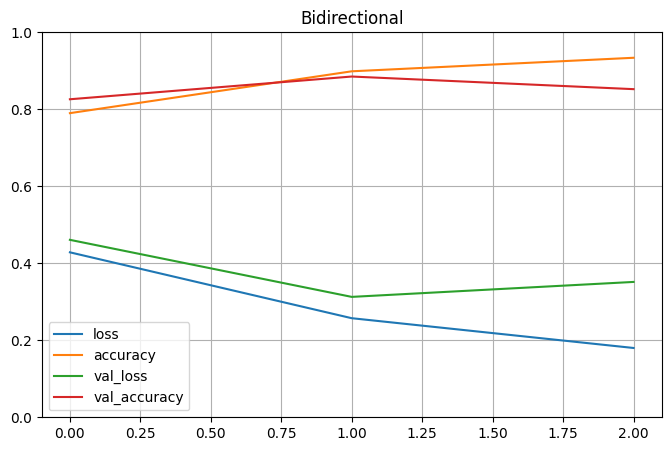

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.title("Bidirectional")
plt.show()

In [ ]:
predictions = model.predict(input_test)

binary_predictions = ['positive' if pred > 0.5 else 'negative' for pred in predictions]

for i in range(10):
    print(f"Predicted: {binary_predictions[i]}, Label: {'positive' if y_test[i] > 0.5 else 'negative'}")

test_loss, test_acc = model.evaluate(input_test, y_test)
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

782/782 [==============================] - 60s 76ms/step
Predicted: negative, Label: negative
Predicted: positive, Label: positive
Predicted: positive, Label: positive
Predicted: negative, Label: negative
Predicted: positive, Label: positive
Predicted: positive, Label: positive
Predicted: positive, Label: positive
Predicted: negative, Label: negative
Predicted: positive, Label: negative
Predicted: positive, Label: positive
782/782 [==============================] - 55s 71ms/step - loss: 0.3630 - accuracy: 0.8512
Test Loss: 0.362966924905777
Test Accuracy: 0.8511599898338318


**Модель DeepRNN**

In [ ]:
embedding_vector_length = 32
model = Sequential()
model.add(Embedding(input_dim=max_features, output_dim=embedding_vector_length, input_length=maxlen))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(32, return_sequences=True)))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(units=256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation='sigmoid'))
model.summary()

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 500, 32)           320000    
                                                                 
 dropout_4 (Dropout)         (None, 500, 32)           0         
                                                                 
 bidirectional_1 (Bidirecti  (None, 500, 64)           16640     
 onal)                                                           
                                                                 
 bidirectional_2 (Bidirecti  (None, 64)                24832     
 onal)                                                           
                                                                 
 dense_5 (Dense)             (None, 256)               16640     
                                                                 
 dropout_5 (Dropout)         (None, 256)              

In [ ]:
history = model.fit(input_train, y_train, batch_size=batch_size, epochs=epochs,validation_split=0.3)

Epoch 1/3
547/547 [==============================] - 481s 863ms/step - loss: 0.4116 - accuracy: 0.8011 - val_loss: 0.2881 - val_accuracy: 0.8849
Epoch 2/3
547/547 [==============================] - 466s 853ms/step - loss: 0.2306 - accuracy: 0.9116 - val_loss: 0.3078 - val_accuracy: 0.8772
Epoch 3/3
547/547 [==============================] - 464s 849ms/step - loss: 0.1664 - accuracy: 0.9394 - val_loss: 0.3640 - val_accuracy: 0.8697


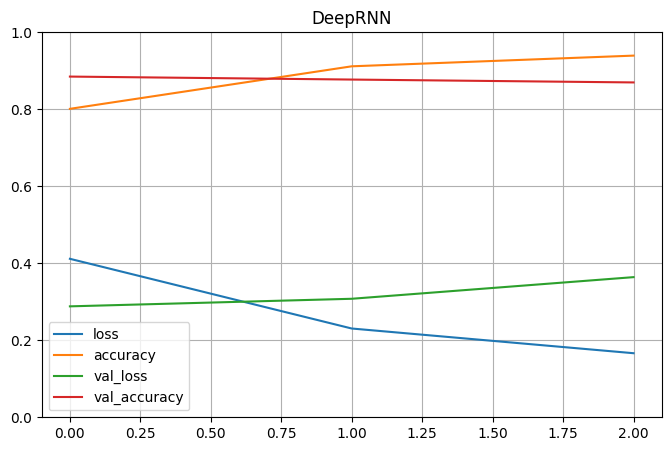

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.title("DeepRNN")
plt.show()

In [ ]:
predictions = model.predict(input_test)

binary_predictions = ['positive' if pred > 0.5 else 'negative' for pred in predictions]

for i in range(10):
    print(f"Predicted: {binary_predictions[i]}, Label: {'positive' if y_test[i] > 0.5 else 'negative'}")

test_loss, test_acc = model.evaluate(input_test, y_test)
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

782/782 [==============================] - 115s 145ms/step
Predicted: negative, Label: negative
Predicted: positive, Label: positive
Predicted: positive, Label: positive
Predicted: positive, Label: negative
Predicted: positive, Label: positive
Predicted: positive, Label: positive
Predicted: positive, Label: positive
Predicted: negative, Label: negative
Predicted: positive, Label: negative
Predicted: positive, Label: positive
782/782 [==============================] - 112s 143ms/step - loss: 0.3894 - accuracy: 0.8565
Test Loss: 0.38942304253578186
Test Accuracy: 0.8565199971199036


Висновки:

SimpleRNN: Test Loss: 0.425 Test Accuracy: 0.841

LSTM: Test Loss: 0.369 Test Accuracy: 0.843

Bidirectional: Test Loss: 0.363 Test Accuracy: 0.851

DeepRNN: Test Loss: 0.389 Test Accuracy: 0.857

Судячі з результатів, доволі всі нейронні мережі показали непогані результати. Але найбільша точність була отримана завдяки моделі DeepRNN.